# Exercici 1

## Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [66]:
#Importamos las librerías
import pandas as pd
import numpy as np
import re
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Cargamos el archivo "Lligues europees UEFA.csv" en un nuevo dataframe
df_uefa = pd.read_csv('C:\\Users\\USER\\Desktop\\Data Science\\Sprint 5. Introducció al Test dHipòtesis i al Machine Learning\\Tasca M5 T01\\Lligues europees UEFA.csv',sep= ";",encoding='latin-1')
df_uefa.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
6,7,Inter,ITA,2,37,24,9,4,81,32,...,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen


In [51]:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

### Breve descripción del archivo y de las columnas

> Es un archivo donde se nos muestran estadísticas de todos los equipos de las 5 ligas más potentes en Europa (Inglaterra, España, Italia, Francia y Alemania)

- Rk: Ranking UEFA.
- Squad: Nombre del equipo.
- Country: Pais.
- LgRk: Ranking en la liga.
- MP: Partidos jugados (W+D+L).
- W: Partidos ganados.
- D: Partidos empatados.
- L: Partidos perdidos.
- GF: Goles a favor.
- GA: Goles en contra.
- GD: Diferencia de goles (GF-GA).
- Pts: Puntos conseguidos en la liga (Wx3 + Dx1).
- Pts/G: Media de puntos por partido (Pts/MP).
- xG: Goles a favor esperados en una liga.
- xGA: Goles en contra esperados en una liga.
- xGD: Diferencia entre los goles esperados a favor y en contra (xG-xGA).
- xGD/90: Diferencia de goles esperada por cada partido (xGD/MP).
- Last 5: Los resultados en los 5 últimos partidos.
- Attendance: Asistencia media a los partidos.
- Top Team Scorer: Nombre del máximo goleador del equipo y número de goles (se separará en 2 columnas diferentes)
- Goalkeeper: Nombre del portero titular.

In [52]:
#Comprobamos si hay valores nulos
df_uefa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

> Vamos a separar la información de la columna "Top Team Scorer" en 2 nuevas columnas: "Top Team Scorer" con el nombre del goleador y "Goals" con el número de goles marcados.

In [53]:
# Extraemos los goles del campo "Top Team Scorer" y creamos una nueva columna "Goals"

df_uefa['Goals'] =  df_uefa['Top Team Scorer'].apply(lambda x: re.findall(r"(\d+)$", x)[0])
df_uefa['Top Team Scorer'] = df_uefa['Top Team Scorer'].apply(lambda x: re.sub(r"\s-\s\d+", '', x, 1))
df_uefa.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Goals
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne,Ederson,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah,Alisson,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema,Thibaut Courtois,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski,Manuel Neuer,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé,Keylor Navas,25
5,6,Milan,ITA,1,37,25,8,4,66,31,...,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão,Mike Maignan,11
6,7,Inter,ITA,2,37,24,9,4,81,32,...,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez,Samir Handanovi?,21
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen,David Ospina,14
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland,Gregor Kobel,22
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay,Marc-André ter Stegen,12


In [55]:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [56]:
# Convertimos el tipo de "Goals" en Integer.
df_uefa['Goals'] = df_uefa.Goals.astype(int)
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

> Compruebo la correlación entre las diferentes variables mediant un mapa de calor

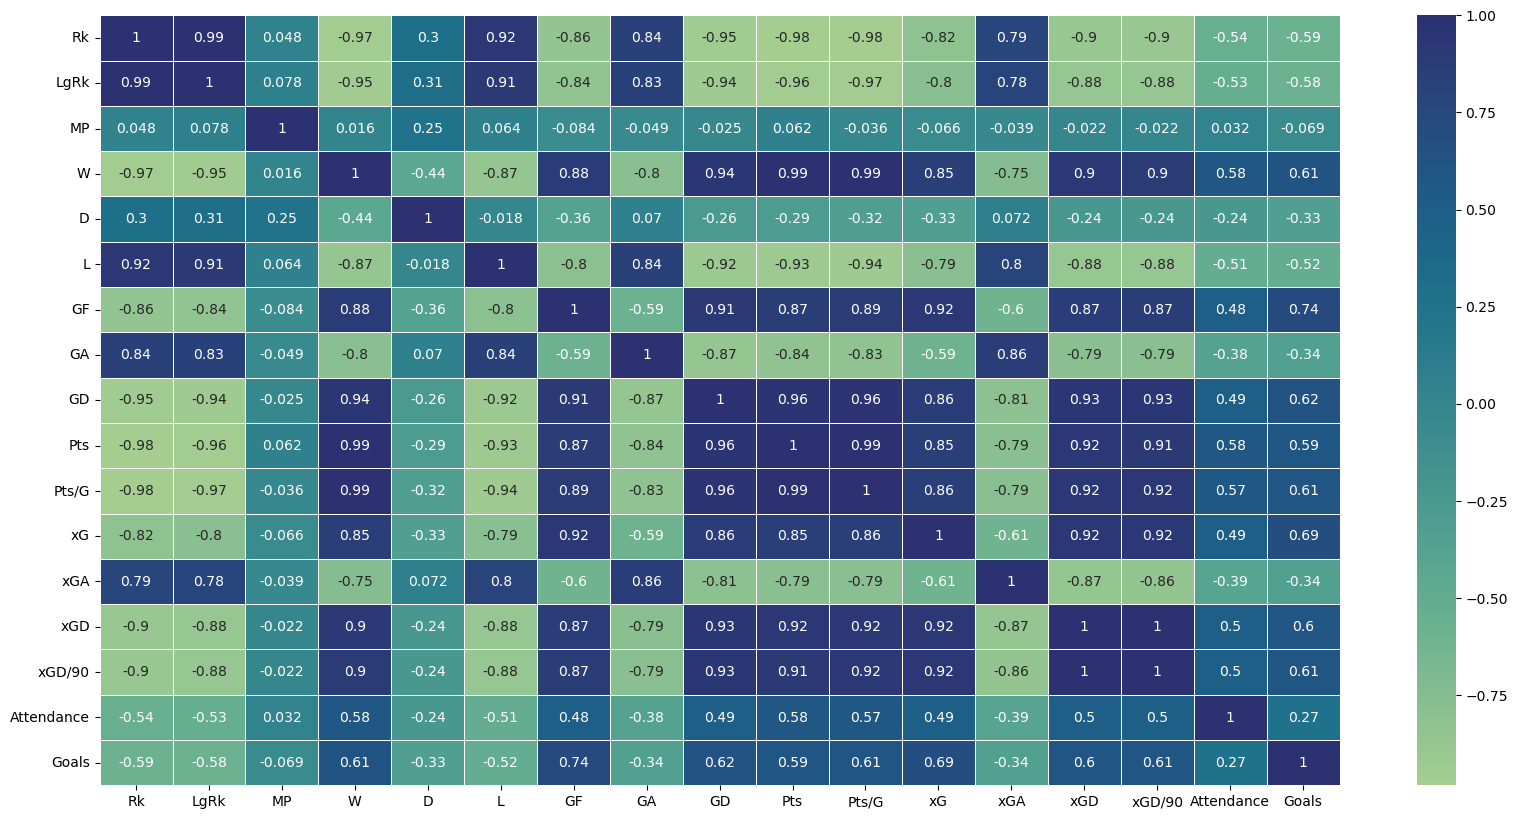

In [57]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_uefa.corr(), annot=True, ax=ax,linewidth=.5, cmap="crest")
plt.show()

> Podmeos ver que existe una correlación muy alta entre varios valores, destacando la existente entre "Rk" y "LgRk" y "W" ,"Pts" y "Pts/G" con un valor del 0.99. Por otro lado tenemos valores con una correlación muy baja cómo por ejemplo la existente entre "MP" y "Attendance" con 0.032 o la existente entre "MP" y "W" con 0.016. En concreto podemos destacar que los partidos jugados por los equipos "MP" no tienen correlación con el resto de variables.

> Comprobamos si el campo "Pts/G" (media de puntos por partido) tiene una distribución gaussiana y para ello utilizamos la prueba de Shapiro-Wilk, donde la H0 es que la distribución de los datos es gaussiana y la HA es que no lo es. 
> También se incluye un histograma y un gráfico de densidad para aportar información visual.

In [58]:
stat, p = stats.shapiro(df_uefa['Pts/G'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
 print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.972, p=0.035
Se rechaza la hipótesis nula. La distribución no es gaussiana


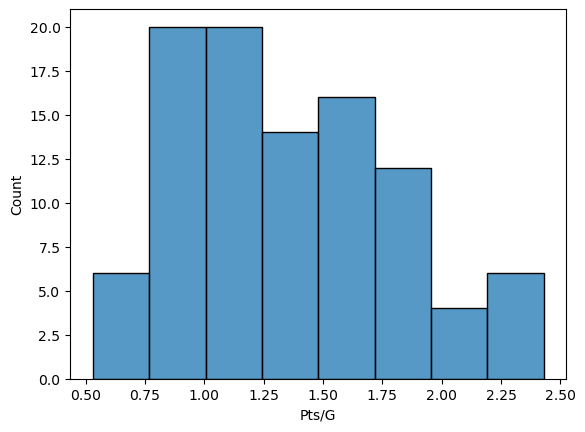

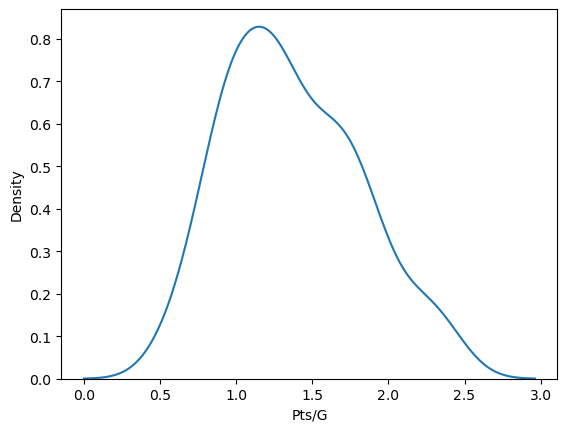

In [59]:
sns.histplot(df_uefa['Pts/G'], kde=False)
plt.show()

sns.kdeplot(df_uefa['Pts/G'])
plt.show()

# Exercici 2

## Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

>  Para este ejercicio he decidido comprobar si existe una correlación lineal entre las variables "W" y "Goals" (partidos ganados por el equipo y los goles de su máximo goleador). Para ello realizaré la prueba del Coeficiente de correlación de Pearson.

In [63]:
stat, p = stats.pearsonr(df_uefa['W'], df_uefa['Goals'])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
 print('No se rechaza la hipótesis nula. Existe una relación lineal entre ambas variables')
else:
 print('Se rechaza la hipótesis nula. No existe una relación lineal entre ambas variables')

stat=0.61313, p=0.00000
Se rechaza la hipótesis nula. No existe una relación lineal entre ambas variables


> Tenemos p-valor muy bajo y evidentemente inferior a el valor de significancia (alfa = 0.05), se rechaza la hipótesis nula y podemos afirmar que no existe una relación lineal entre ambas variables.

> 

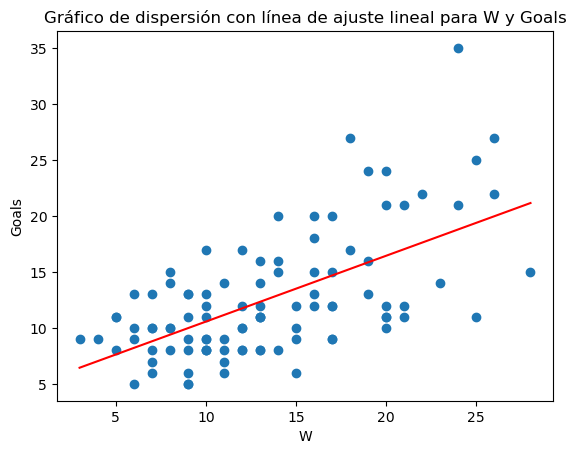

In [68]:
plt.scatter(df_uefa['W'], df_uefa['Goals'])
plt.plot(np.unique(df_uefa['W']), np.poly1d(np.polyfit(df_uefa['W'],df_uefa['Goals'], 1))(np.unique(df_uefa['W'])), color='red')
plt.xlabel('W')
plt.ylabel('Goals')
plt.title('Gráfico de dispersión con línea de ajuste lineal para W y Goals')
plt.show()

# Exercici 3

## Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

> Para este ejercicio las 3 variables seleccionadas serán: "W","Pts" y "GF" y utilizaremos el análisis de varianza (ANOVA) para comprobar si las medias de las muestras son significativamente diferentes.

In [74]:
stat, p = stats.f_oneway(df_uefa['W'], df_uefa['Pts'], df_uefa['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('No se rechaza la H0. Las medias de las tres variables son iguales')
else:
 print('Se rechaza la H0. Las medias son significativamente diferentes')

stat=240.611, p=0.000
Se rechaza la H0. Las medias son significativamente diferentes


> Obtenemos un p-valor muy bajo, por lo que podemos rechazar la hipótesis nula y afirmar que al menos una de las variables tiene una media diferente.
> Realizamos un boxplot y un kdeplot para visualizarlo.

<Axes: >

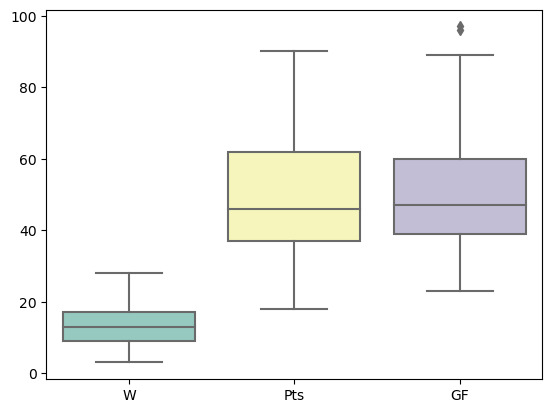

In [75]:
sns.boxplot(data=df_uefa[['W', 'Pts', 'GF']], palette="Set3")

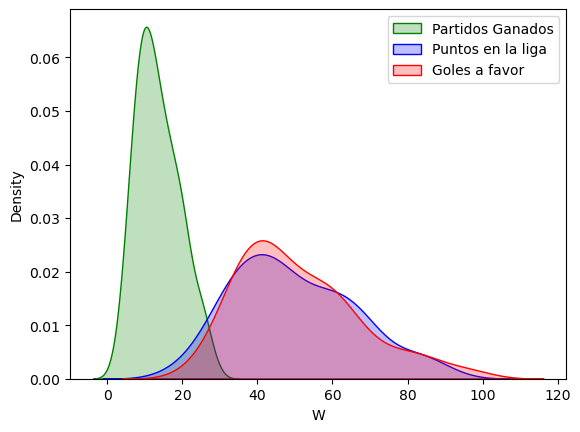

In [76]:
sns.kdeplot(df_uefa['W'], label= 'Partidos Ganados', color= 'green', fill = True)
sns.kdeplot(df_uefa['Pts'], label= 'Puntos en la liga', color= 'blue', fill = True)
sns.kdeplot(df_uefa['GF'], label= 'Goles a favor', color= 'red', fill = True)
plt.legend()
plt.show()